In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# to get the values always in float
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv('movies.csv')

In [4]:
df.shape

(7668, 15)

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00


In [6]:
# Task: finding the fields that are directly correlated to the gross revenue


In [7]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
# replacing the missing value with the most frequent value

from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df[['rating']] = mode_imputer.fit_transform(df[['rating']])


In [9]:
# Since there are very few missing values in these columns so we can directly drop them
df.dropna(subset=['released','score','votes', 'writer', 'star', 'country', 'runtime'], inplace = True)

In [10]:
# using KNN imputer because we can't directly drop all the missing values
# KNN imputer uses the similarity between observations to imputer the missing values.

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
df[['budget']] = imputer.fit_transform(df[['budget']])
df[['gross']] = imputer.fit_transform(df[['gross']])

In [11]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Applying the LabelEncoder to the 'company' column
df['company_encoded'] = label_encoder.fit_transform(df['company'].astype(str))

# Initializing the KNN imputer
imputer = KNNImputer(n_neighbors = 5)

# Applying the KNN imputer to the encoded 'company' column
df[['company_encoded']] = imputer.fit_transform(df[['company_encoded']])

# Convert the numeric data back to the original categorical form
df['company'] = label_encoder.inverse_transform(df['company_encoded'].astype(int))

# Drop the encoded column
df.drop(columns = ['company_encoded'], inplace = True)

In [12]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [14]:
# Data type for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [15]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [17]:
# since in the dataset, few rows contains different values for year and release date year
# which is an error
# creating correct year column

df['correct_year'] = df['released'].astype(str).str.extract(r'(\d{4})')

In [18]:
df['correct_year'] = df['correct_year'].astype(int)

In [19]:
df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime         float64
correct_year      int32
dtype: object

In [21]:
df.drop(columns=['year'], inplace = True)

In [22]:
# to view all the rows
pd.set_option('display.max_rows', None)

In [88]:
df.sort_values(by=['gross'], inplace= False, ascending = False).head(10)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.80,1100000.00,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.00,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.40,903000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.00,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.80,1100000.00,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.00,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.80,876000.00,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.00,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.40,897000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.00,2018
7480,The Lion King,PG,Animation,"July 19, 2019 (United States)",6.90,222000.00,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.00,2019
6653,Jurassic World,PG-13,Action,"June 12, 2015 (United States)",7.00,593000.00,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.00,2015
6043,The Avengers,PG-13,Action,"May 4, 2012 (United States)",8.00,1300000.00,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.00,2012
6646,Furious 7,PG-13,Action,"April 3, 2015 (United States)",7.10,370000.00,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.00,2015
7494,Frozen II,PG,Animation,"November 22, 2019 (United States)",6.80,148000.00,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.00,2019


In [24]:
# droping the duplicates

df = df.drop_duplicates()

In [82]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.00,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.00,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.00,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.00,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.00,1980


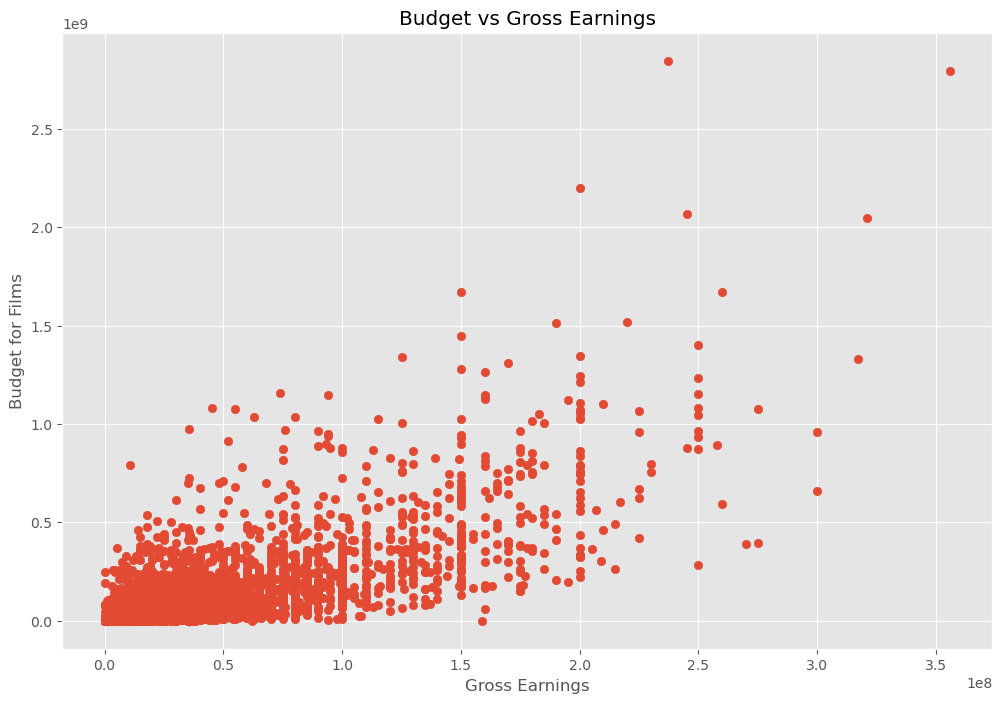

In [26]:
# scatter plot with budget vs gross

plt.scatter(x = df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Films')
plt.show()

In [27]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.00,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.00,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.00,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.00,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.00,1980


<Axes: xlabel='budget', ylabel='gross'>

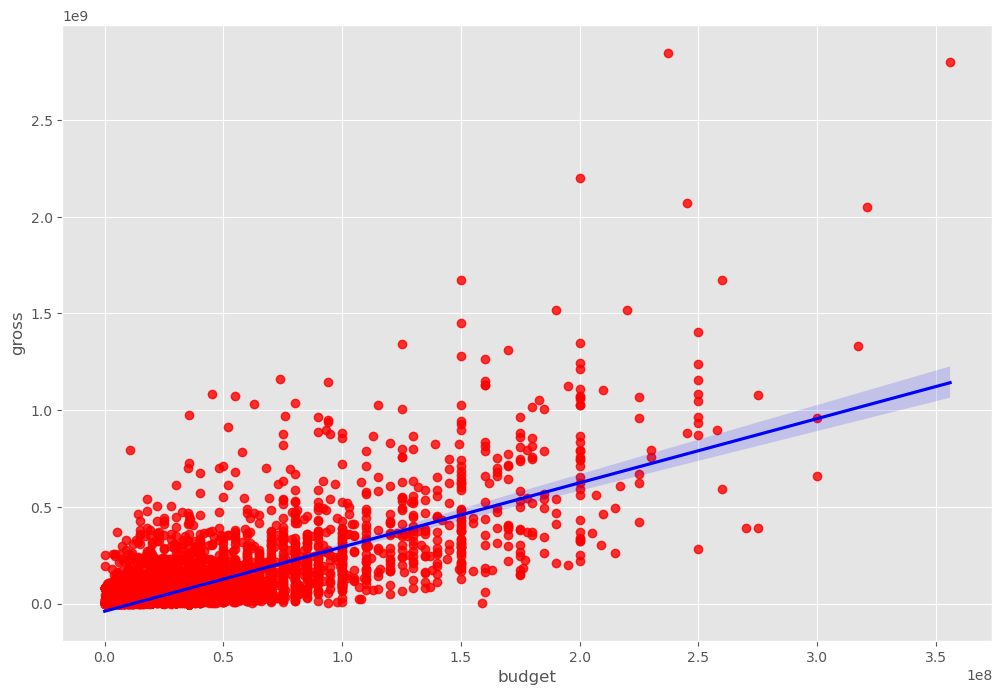

In [28]:
# Plot budget vs gross using seaborn
# using regression plot to find the relation
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws={'color' :'red'}, line_kws= {'color':'blue'})

In [29]:
# let's start looking at correlation

numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr(method = 'pearson')    # pearson correlation - It is the default correlation
# other correlations are kendall, spearman

,score,votes,budget,gross,runtime,correct_year
score,1.00,0.41,0.06,0.18,0.40,0.11
votes,0.41,1.00,0.42,0.63,0.31,0.22
budget,0.06,0.42,1.00,0.71,0.27,0.26
gross,0.18,0.63,0.71,1.00,0.24,0.25
runtime,0.40,0.31,0.27,0.24,1.00,0.12
correct_year,0.11,0.22,0.26,0.25,0.12,1.00


In [30]:
# High correlation between budget and gross

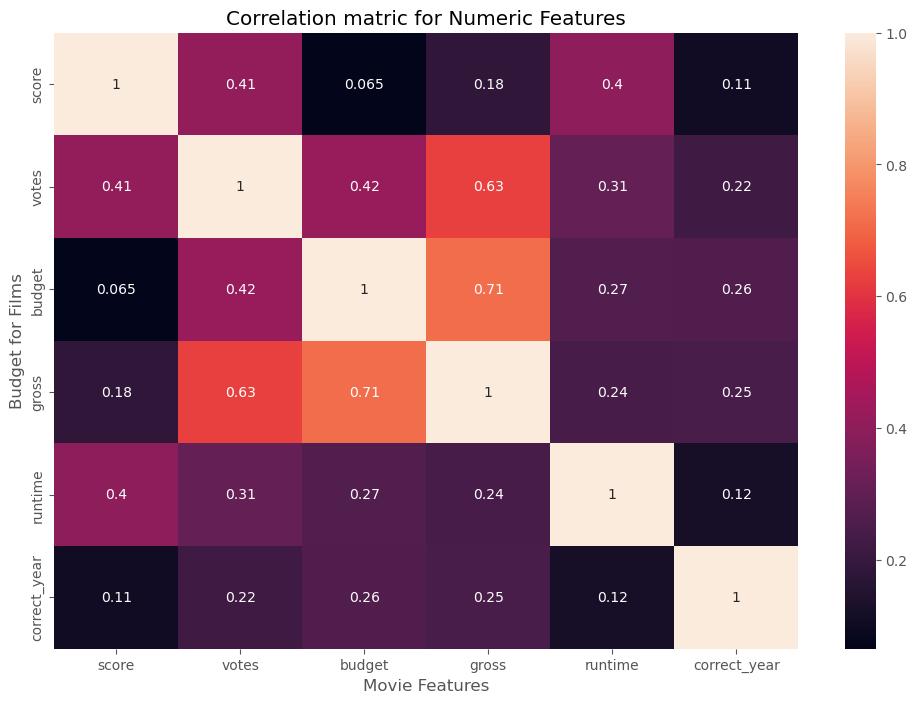

In [31]:
correlation_matrix = numerical_df.corr(method='pearson')


sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matric for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Budget for Films')


plt.show()

In [84]:
# converting the values categorical value into numerical form 
# in order to find the correlation between all the values

df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,6577,6,6,1701,8.40,927000.00,2585,4008,1043,54,19000000,46998772,2312,146.00,1980
1,5566,6,1,1488,5.80,65000.00,2266,1630,325,55,4500000,58853106,727,104.00,1980
2,5135,4,0,1767,8.70,1200000.00,1111,2564,1741,55,18000000,538375067,1533,124.00,1980
3,286,4,4,1488,7.70,221000.00,1300,1997,2240,55,3500000,83453539,1805,88.00,1980
4,1027,6,4,1539,7.30,108000.00,1054,520,408,55,6000000,39846344,1770,98.00,1980


In [86]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.00,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.00,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.00,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.00,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.00,1980


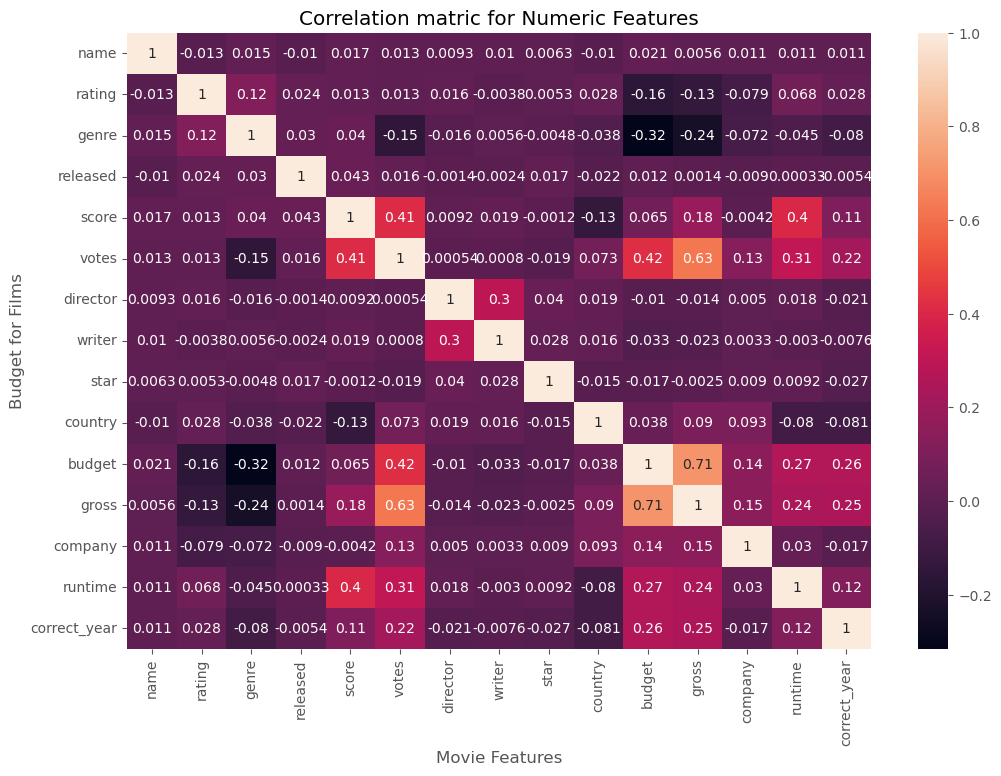

In [67]:
correlation_matrix = df_numerized.corr(method='pearson')


sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matric for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Budget for Films')


plt.show()

In [69]:
df_numerized.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
name,1.00,-0.01,0.01,-0.01,0.02,0.01,0.01,0.01,0.01,-0.01,0.02,0.01,0.01,0.01,0.01
rating,-0.01,1.00,0.12,0.02,0.01,0.01,0.02,-0.00,0.01,0.03,-0.16,-0.13,-0.08,0.07,0.03
genre,0.01,0.12,1.00,0.03,0.04,-0.15,-0.02,0.01,-0.00,-0.04,-0.32,-0.24,-0.07,-0.04,-0.08
released,-0.01,0.02,0.03,1.00,0.04,0.02,-0.00,-0.00,0.02,-0.02,0.01,0.00,-0.01,0.00,-0.01
score,0.02,0.01,0.04,0.04,1.00,0.41,0.01,0.02,-0.00,-0.13,0.06,0.18,-0.00,0.40,0.11
votes,0.01,0.01,-0.15,0.02,0.41,1.00,0.00,0.00,-0.02,0.07,0.42,0.63,0.13,0.31,0.22
director,0.01,0.02,-0.02,-0.00,0.01,0.00,1.00,0.30,0.04,0.02,-0.01,-0.01,0.01,0.02,-0.02
writer,0.01,-0.00,0.01,-0.00,0.02,0.00,0.30,1.00,0.03,0.02,-0.03,-0.02,0.00,-0.00,-0.01
star,0.01,0.01,-0.00,0.02,-0.00,-0.02,0.04,0.03,1.00,-0.01,-0.02,-0.00,0.01,0.01,-0.03
country,-0.01,0.03,-0.04,-0.02,-0.13,0.07,0.02,0.02,-0.01,1.00,0.04,0.09,0.09,-0.08,-0.08


In [71]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.00
              rating         -0.01
              genre           0.01
              released       -0.01
              score           0.02
              votes           0.01
              director        0.01
              writer          0.01
              star            0.01
              country        -0.01
              budget          0.02
              gross           0.01
              company         0.01
              runtime         0.01
              correct_year    0.01
rating        name           -0.01
              rating          1.00
              genre           0.12
              released        0.02
              score           0.01
              votes           0.01
              director        0.02
              writer         -0.00
              star            0.01
              country         0.03
              budget         -0.16
              gross          -0.13
              company        -0.08
              runtim

In [77]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.32
genre         budget         -0.32
              gross          -0.24
gross         genre          -0.24
budget        rating         -0.16
rating        budget         -0.16
genre         votes          -0.15
votes         genre          -0.15
country       score          -0.13
score         country        -0.13
gross         rating         -0.13
rating        gross          -0.13
correct_year  country        -0.08
country       correct_year   -0.08
runtime       country        -0.08
country       runtime        -0.08
correct_year  genre          -0.08
genre         correct_year   -0.08
company       rating         -0.08
rating        company        -0.08
company       genre          -0.07
genre         company        -0.07
              runtime        -0.04
runtime       genre          -0.04
genre         country        -0.04
country       genre          -0.04
budget        writer         -0.03
writer        budget         -0.03
star          correc

In [79]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes         gross          0.63
gross         votes          0.63
budget        gross          0.71
gross         budget         0.71
name          name           1.00
writer        writer         1.00
company       company        1.00
gross         gross          1.00
budget        budget         1.00
country       country        1.00
star          star           1.00
director      director       1.00
votes         votes          1.00
score         score          1.00
released      released       1.00
genre         genre          1.00
rating        rating         1.00
runtime       runtime        1.00
correct_year  correct_year   1.00
dtype: float64

### Conclusion:
Budget and votes have the highest correlation to gross earnings